Exercise: *Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the
algorithm, you should probably reduce the dataset’s dimensionality (e.g., use
PCA, preserving 99% of the variance).* <br>
Here, I copy all the relevant code blocks from the `exercise_10.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [4]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [5]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [6]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_predict = gm.fit_predict(X_train_pca)

Exercise: *Use the model to generate some new faces (using the `sample()` method), and visualize them (if you used PCA, you will need to use its `inverse_transform()` method).*

We reuse the `plot_faces()` function from `exercise_10.ipynb`.

In [7]:
def plot_faces(faces: np.ndarray, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.title(label)
        plt.axis("off")
    plt.show()

In [8]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

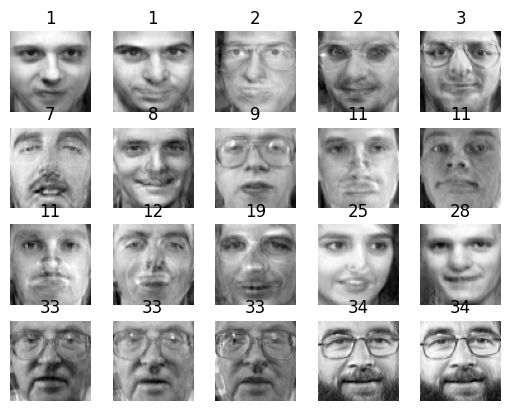

In [9]:
plot_faces(gen_faces, y_gen_faces)

Exercise: *Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).*

In [10]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64 * 64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64 * 64)
y_flipped = y_train[:n_rotated]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

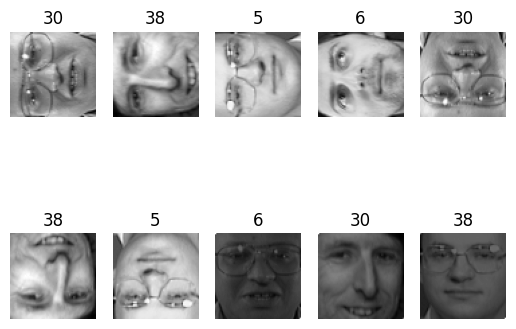

In [11]:
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad_faces = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad_faces)

In [12]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [13]:
gm.score_samples(X_bad_faces_pca)

array([-1.85962799e+07, -1.73014259e+07, -4.15206610e+07, -4.81260162e+07,
       -3.20478915e+07, -1.35426739e+07, -2.92373877e+07, -9.25148868e+07,
       -1.03272268e+08, -5.41696791e+07])

The bad faces are considered highly unlikely by the Gaussian Mixture model. Compare this to the scores of some training instances.

In [15]:
gm.score_samples(X_train_pca[:10])

array([1163.02020916, 1112.17308349, 1156.32132812, 1170.67602778,
       1073.69246131, 1139.89252841, 1113.76629843, 1073.69244892,
       1048.17522752, 1048.17520636])